In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Fifa_world_cup_matches.csv')
df.head()

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42%,50%,8%,0,2,20 NOV 2022,17 : 00,Group A,...,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72%,19%,9%,6,2,21 NOV 2022,14 : 00,Group B,...,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,21 NOV 2022,17 : 00,Group A,...,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,51%,39%,10%,1,1,21 NOV 2022,20 : 00,Group B,...,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22 NOV 2022,11 : 00,Group C,...,1,0,4,14,0,0,65,80,163,361


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 88 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   team1                                                  64 non-null     object
 1   team2                                                  64 non-null     object
 2   possession team1                                       64 non-null     object
 3   possession team2                                       64 non-null     object
 4   possession in contest                                  64 non-null     object
 5   number of goals team1                                  64 non-null     int64 
 6   number of goals team2                                  64 non-null     int64 
 7   date                                                   64 non-null     object
 8   hour                                                   64 non-

In [7]:
df.shape

(64, 88)

In [8]:
# Check for null values
df.isnull().sum()

team1                                0
team2                                0
possession team1                     0
possession team2                     0
possession in contest                0
                                    ..
own goals team2                      0
forced turnovers team1               0
forced turnovers team2               0
defensive pressures applied team1    0
defensive pressures applied team2    0
Length: 88, dtype: int64

In [13]:
# Group by teams and sum goals
goals_scored = df.groupby('team1')['number of goals team1'].sum() + df.groupby('team2')['number of goals team2'].sum()

goals_scored.sort_values(ascending=False).head(10)


team1
FRANCE         16
ARGENTINA      15
ENGLAND        13
PORTUGAL       12
NETHERLANDS    10
SPAIN           9
BRAZIL          8
CROATIA         8
GERMANY         6
MOROCCO         6
dtype: int64

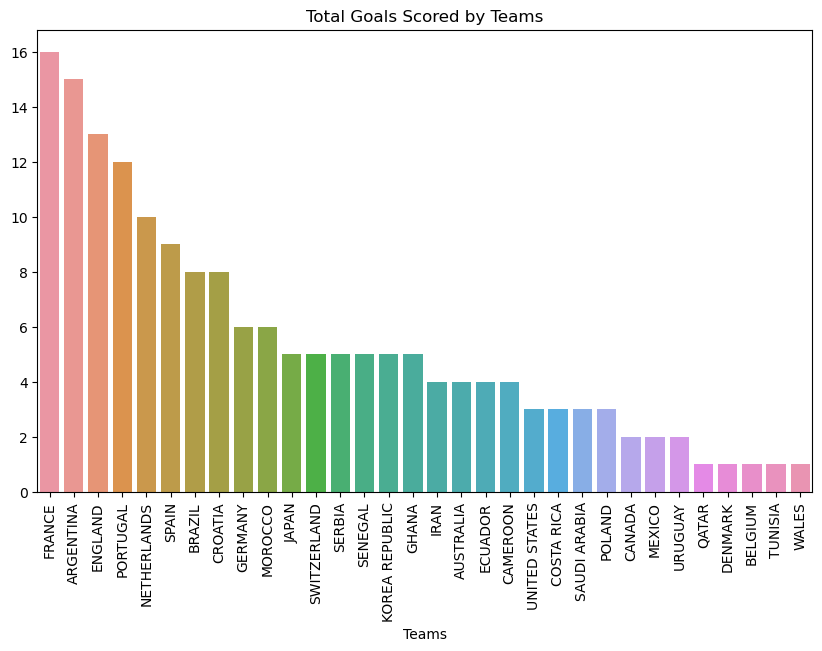

In [18]:
# Sort teams by total goals scored (ascending order)
goals_scored_sorted = goals_scored.sort_values(ascending=False)

# Plot goals scored by team (sorted by goals)
plt.figure(figsize=(10,6))
sns.barplot(x=goals_scored_sorted.index, y=goals_scored_sorted.values)

# Update the x-axis label to "Teams" and rotate the labels for better readability
plt.xlabel('Teams')
plt.xticks(rotation=90)
plt.title('Total Goals Scored by Teams')

# Display the plot
plt.show()

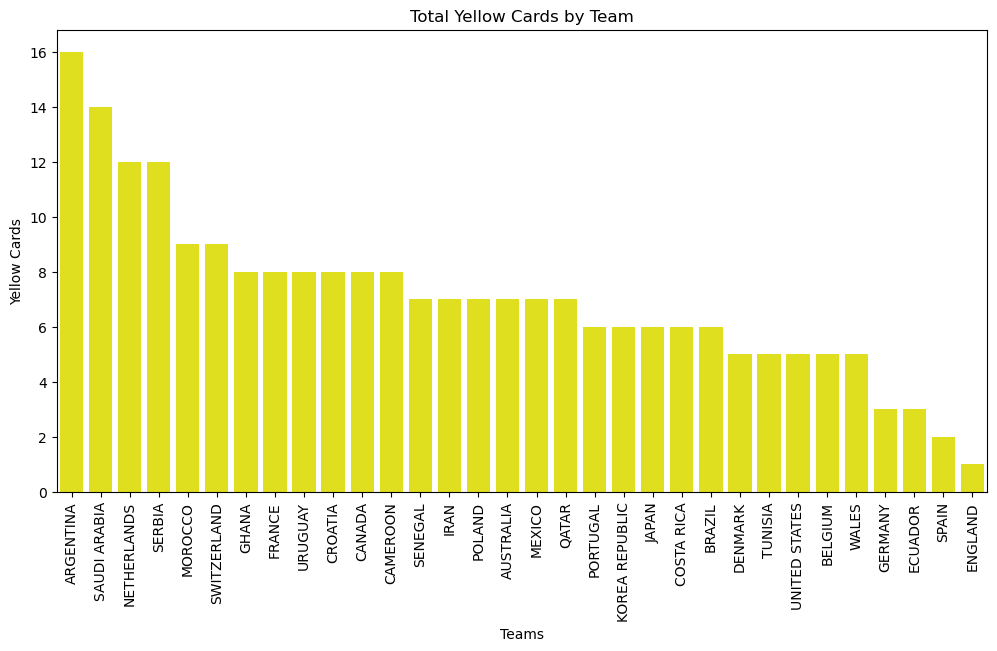

In [24]:
yellow_cards = df.groupby('team1')['yellow cards team1'].sum() + df.groupby('team2')['yellow cards team2'].sum()
yellow_cards_sorted = yellow_cards.sort_values(ascending=False)
# Plot yellow cards
plt.figure(figsize=(12,6))
sns.barplot(x=yellow_cards_sorted.index, y=yellow_cards_sorted.values, color='yellow')
plt.xticks(rotation=90)
plt.title('Total Yellow Cards by Team')
plt.xlabel('Teams')
plt.ylabel('Yellow Cards')
plt.show()

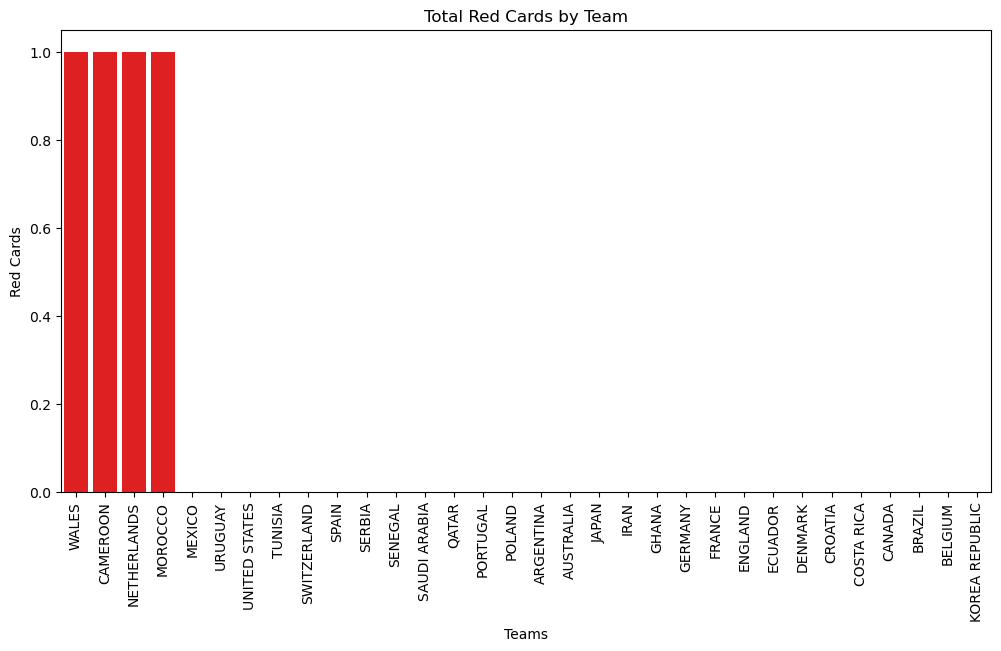

In [29]:
# Sum red cards for team1 and team2, then convert the final result to integers
red_cards = (df.groupby('team1')['red cards team1'].sum() + df.groupby('team2')['red cards team2'].sum()).astype(int)

# Sort red cards in descending order
red_cards_sorted = red_cards.sort_values(ascending=False)

# Plot red cards
plt.figure(figsize=(12,6))
sns.barplot(x=red_cards_sorted.index, y=red_cards_sorted.values, color='red')
plt.xticks(rotation=90)
plt.title('Total Red Cards by Team')
plt.xlabel('Teams')
plt.ylabel('Red Cards')
plt.show()

Text(0.5, 0, 'Teams')

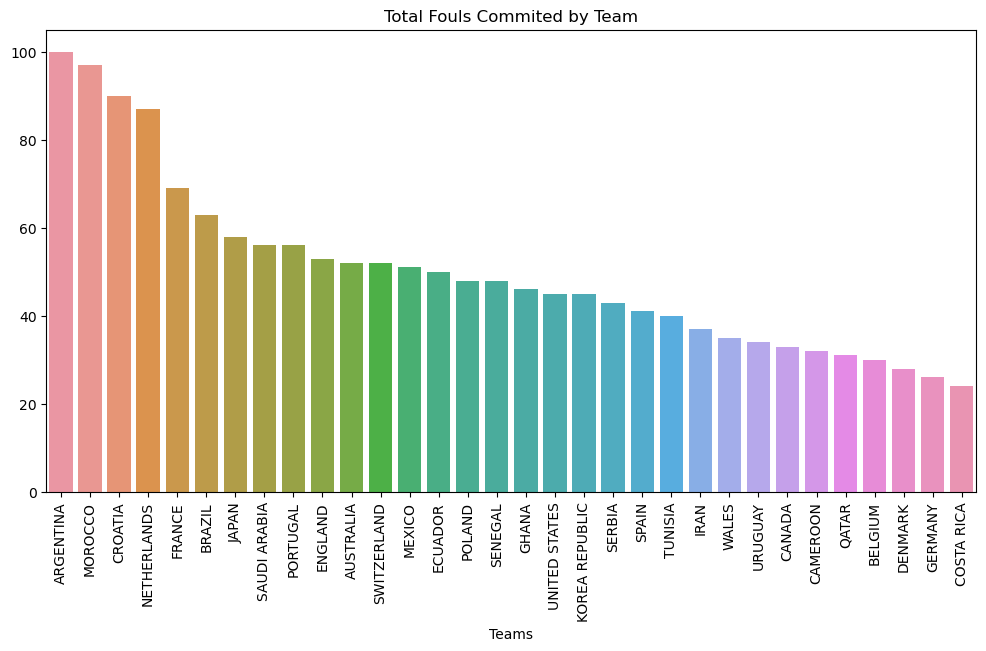

In [30]:
fouls = df.groupby('team1')['fouls against team1'].sum() +df.groupby('team2')['fouls against team2'].sum()
fouls_sorted = fouls.sort_values(ascending=False)

# Plot fouls

plt.figure(figsize=(12,6))
sns.barplot(x=fouls_sorted.index, y=fouls_sorted.values)
plt.xticks(rotation=90)
plt.title('Total Fouls Commited by Team')
plt.xlabel('Teams')

In [33]:
# Create a new column for total fouls in each match
df['total_fouls'] = df['fouls against team1'] + df['fouls against team2']

# Find the match with the most fouls
most_fouls_match = df[df['total_fouls'] == df['total_fouls'].max()]

most_fouls_match


,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2,total_fouls
57,NETHERLANDS,ARGENTINA,45%,44%,11%,2,2,09 DEC 2022,20 : 00,Quarter-final,...,1,15,5,0,0,91,79,401,323,48


In [34]:
df['total_yellow_cards'] = df['yellow cards team1'] + df['yellow cards team2']

# Find the match with the most yellow cards

most_yellow_cards_match = df[df['total_yellow_cards'] == df['total_yellow_cards'].max()]

most_yellow_cards_match

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2,total_fouls,total_yellow_cards
57,NETHERLANDS,ARGENTINA,45%,44%,11%,2,2,09 DEC 2022,20 : 00,Quarter-final,...,15,5,0,0,91,79,401,323,48,16


In [36]:
df['total_goals_scored'] = df['number of goals team1'] + df['number of goals team2']

# Find the match with the most goals scored

most_goals_scored_match = df[df['total_goals_scored'] == df['total_goals_scored'].max()]

most_goals_scored_match

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2,total_fouls,total_yellow_cards,total_goals_scored
1,ENGLAND,IRAN,72%,19%,9%,6,2,21 NOV 2022,14 : 00,Group B,...,13,0,0,63,72,139,416,23,2,8
